# How to explicitly execute another step before a SoS step

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * Target `sos_step` explicitly depends on a step
  

## Target `sos_step` 

The `sos_step` target represents, needless to say, a SoS step. This target provides a straightforward method to specify step dependencies. For example,

In [51]:
%run
[init]
print("Initialize")

[10]
depends: sos_step("init")
print(f"I am {step_name}")

Initialize
I am default_10


What is more interesting, however, is that `sos_step('a')` matches to steps such as `a_1`, `a_2` so the step will depend on the execution of the entire workflow.

For example, in the following workflow, step `default` depends on `sos_step('work')`, which triggers a process-oriented workflow `work` with steps `work_1` and `work_2`.

> test.dot (859 B):

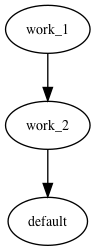

In [5]:
%preview -n test.dot
%run -d test.dot

[work_1]
# generate result
output: 'result.txt'
sh: expand=True
  echo some result > {_output}

[work_2]
# backup result
output: 'result.txt.bak'
sh: expand=True
  cp {_input} {_output}
  
[default]
depends: sos_step("work")

## Further reading

* 